In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Shambhavee Gune\anaconda3\Lib\site-packages\sklearn\datasets\data\iris.csv")
df.head()

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.isnull().sum()

150           0
4             0
setosa        0
versicolor    0
virginica     0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum()

150           0
4             0
setosa        0
versicolor    0
virginica     0
dtype: int64

In [7]:
numeric_df = df.select_dtypes(include='number')
mean_val = numeric_df.mean()
median_val = numeric_df.median()
mode_val = numeric_df.mode().iloc[0]
std_dev = numeric_df.std()
print("Mean:\n", mean_val)
print("Median:\n", median_val)
print("Mode:\n", mode_val)
print("Standard Deviation:\n", std_dev)

Mean:
 150           5.843624
4             3.059732
setosa        3.748993
versicolor    1.194631
virginica     0.993289
dtype: float64
Median:
 150           5.8
4             3.0
setosa        4.3
versicolor    1.3
virginica     1.0
dtype: float64
Mode:
 150           5.0
4             3.0
setosa        1.4
versicolor    0.2
virginica     0.0
Name: 0, dtype: float64
Standard Deviation:
 150           0.830851
4             0.436342
setosa        1.767791
versicolor    0.762622
virginica     0.817847
dtype: float64


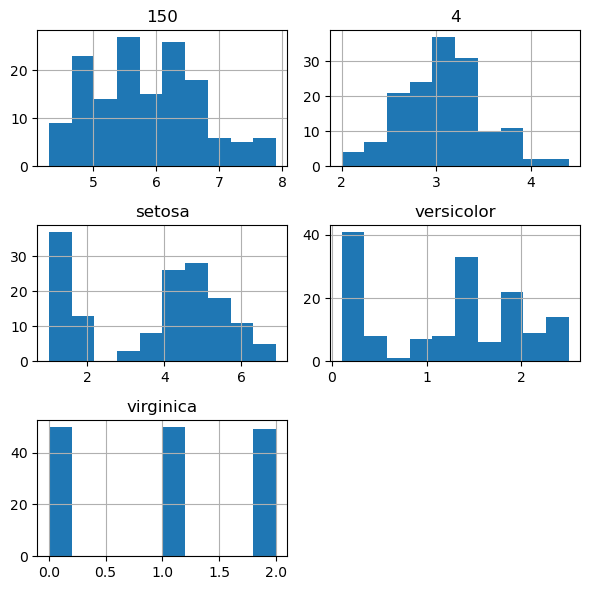

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df.hist(figsize=(6, 6))
plt.tight_layout()
plt.show()

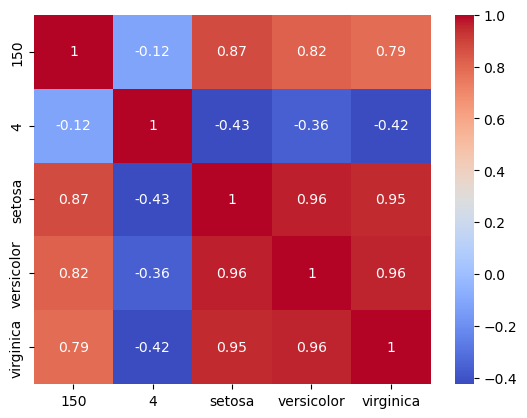

In [9]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [11]:
df.head()

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.shape

(149, 5)

In [13]:
df.describe

<bound method NDFrame.describe of      150    4  setosa  versicolor  virginica
0    5.1  3.5     1.4         0.2          0
1    4.9  3.0     1.4         0.2          0
2    4.7  3.2     1.3         0.2          0
3    4.6  3.1     1.5         0.2          0
4    5.0  3.6     1.4         0.2          0
..   ...  ...     ...         ...        ...
145  6.7  3.0     5.2         2.3          2
146  6.3  2.5     5.0         1.9          2
147  6.5  3.0     5.2         2.0          2
148  6.2  3.4     5.4         2.3          2
149  5.9  3.0     5.1         1.8          2

[149 rows x 5 columns]>

In [14]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.groupby('species').size()

species
0    50
1    50
2    49
dtype: int64

In [17]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_columns].values
y = df['species'].values

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

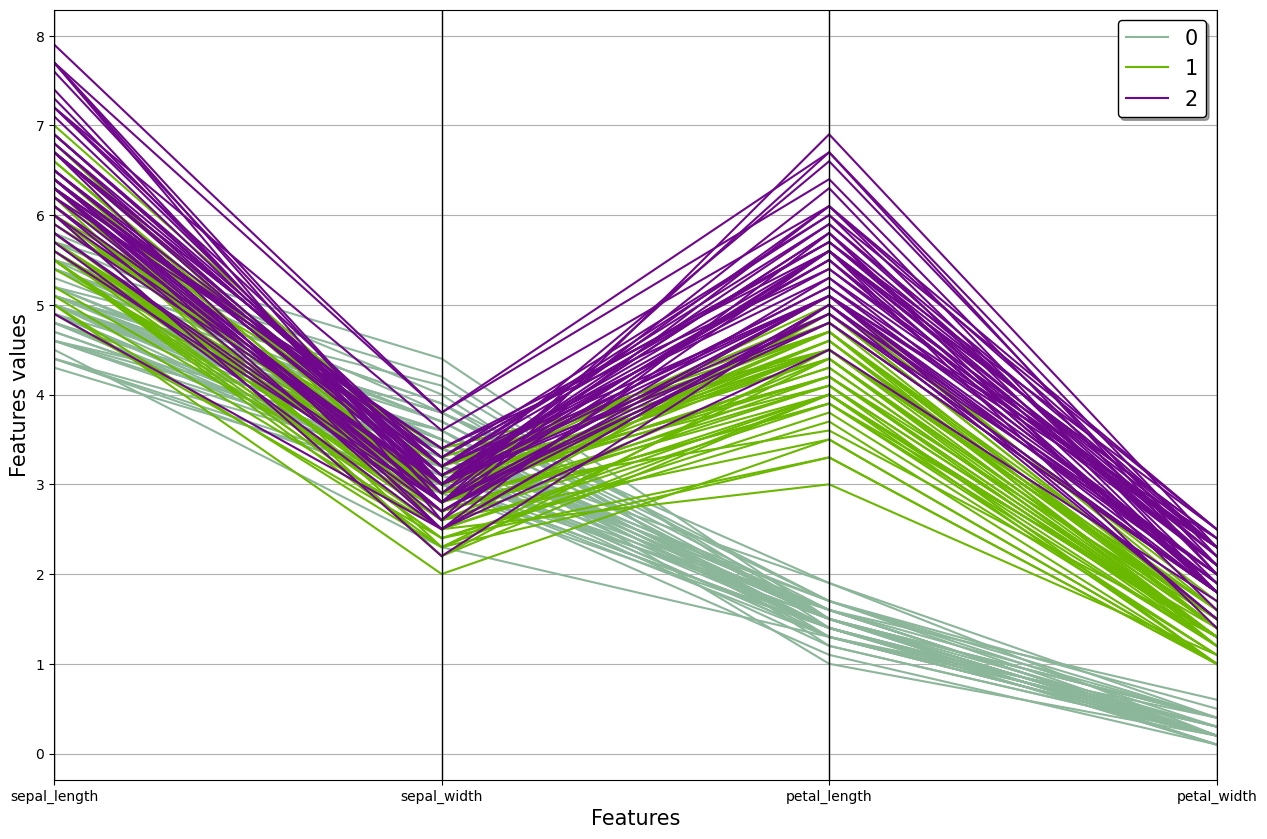

In [20]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df, class_column="species")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

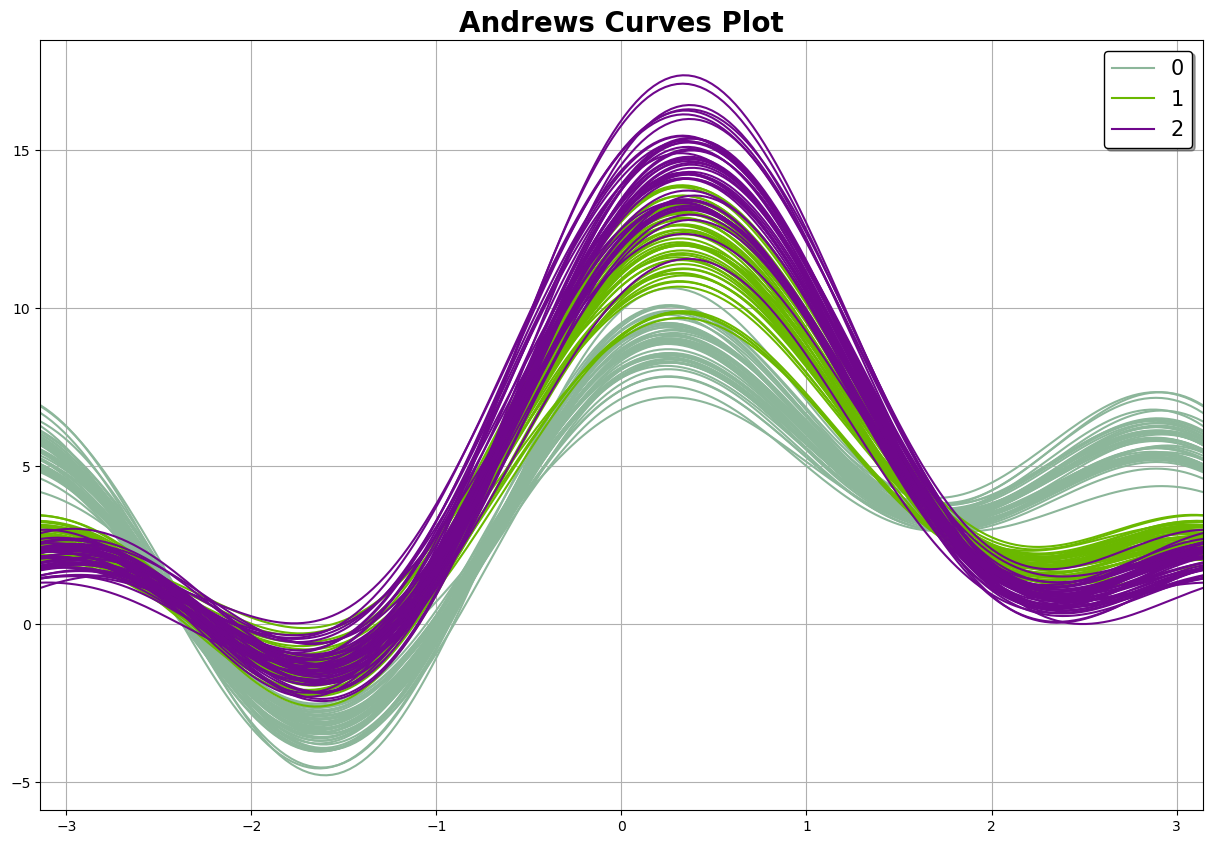

In [21]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df, class_column="species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

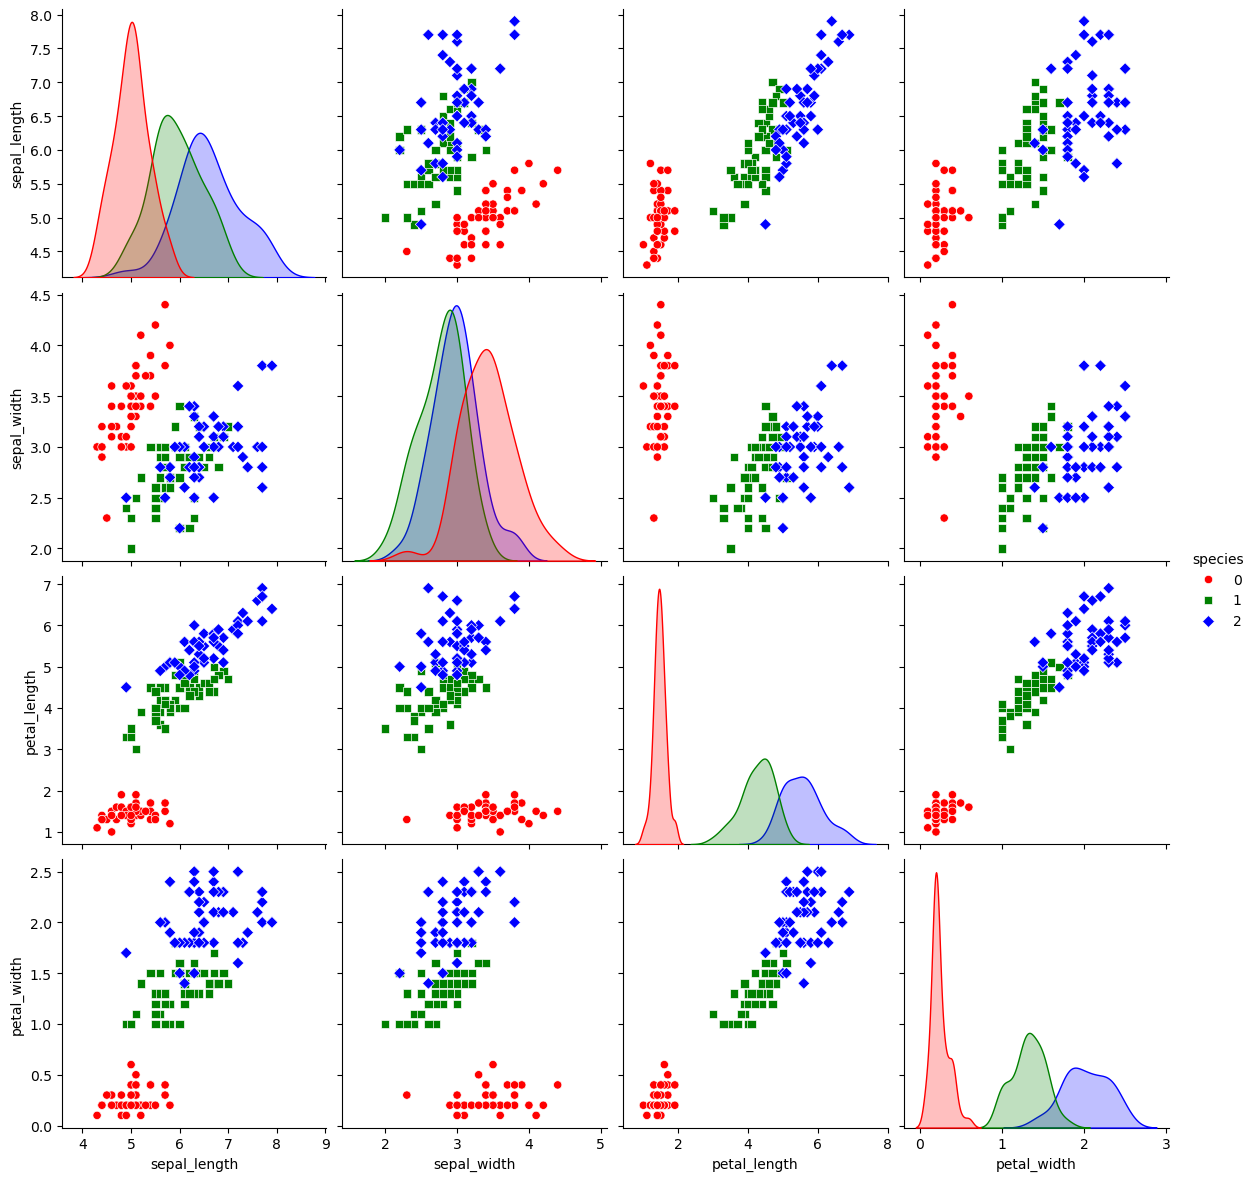

In [22]:
plt.figure()
sns.pairplot(df, hue = "species", height=3, markers=["o", "s", "D"], palette={0: "red", 1: "green", 2: "blue"})
plt.show()

<Figure size 640x480 with 0 Axes>

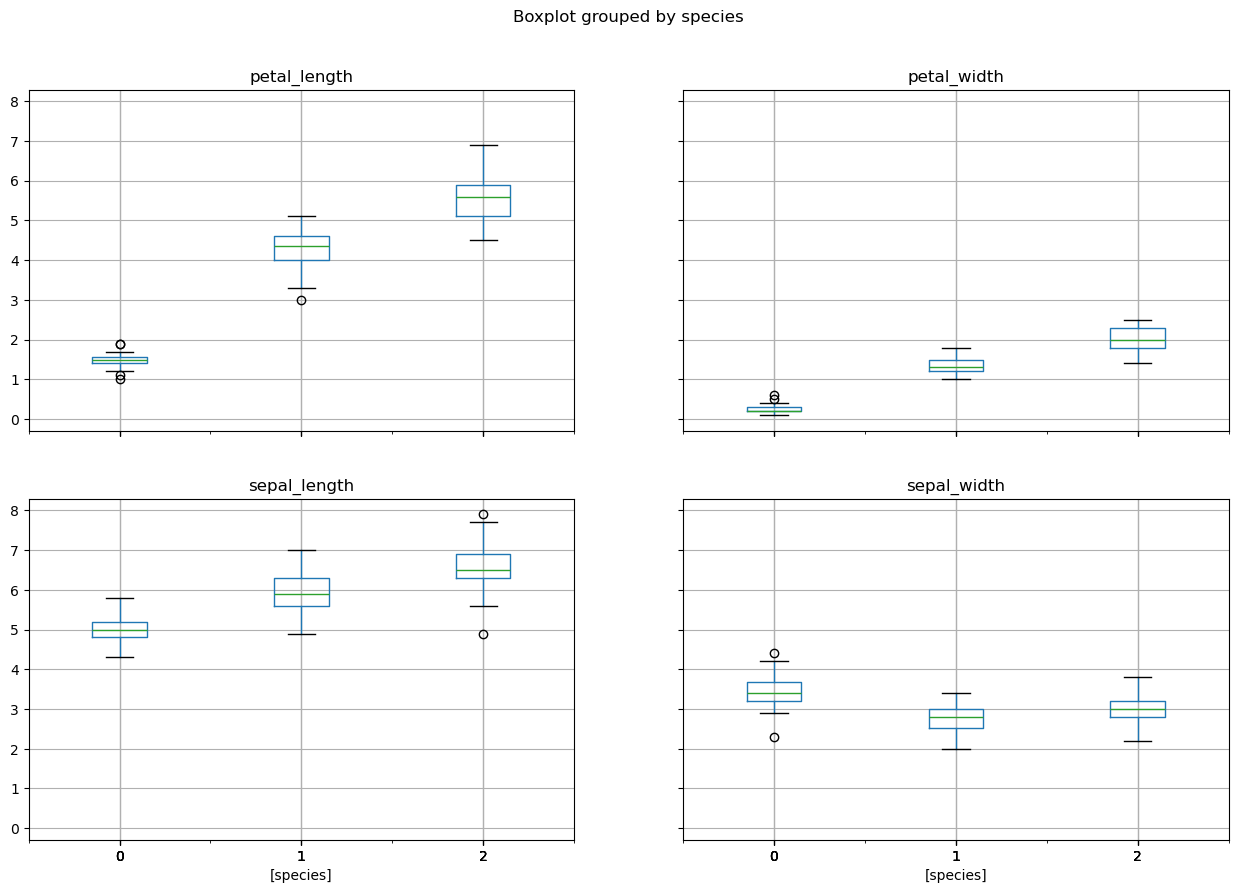

In [23]:
plt.figure()
df.boxplot(by="species", figsize=(15, 10))
plt.show()

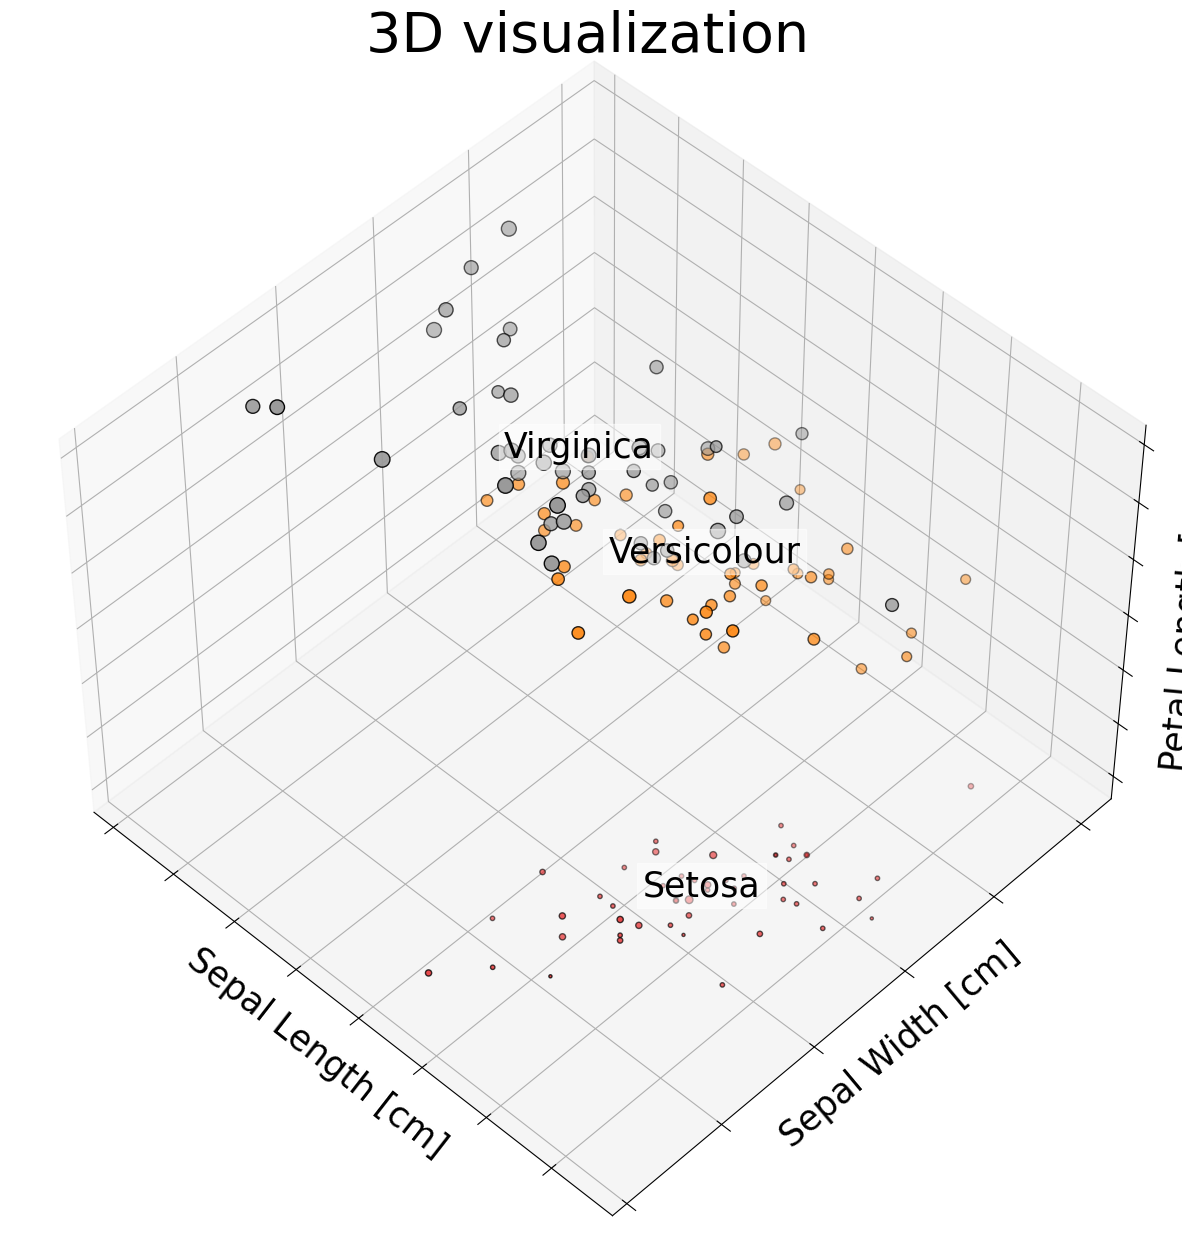

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

# Convert y from string labels to numeric if needed
from sklearn.preprocessing import LabelEncoder
y_numeric = LabelEncoder().fit_transform(y)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_numeric,
           cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3] * 50)

for name, label in [('Virginica', 2), ('Setosa', 0), ('Versicolour', 1)]:
    ax.text3D(X[y_numeric == label, 0].mean(),
              X[y_numeric == label, 1].mean(),
              X[y_numeric == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.set_zlabel("Petal Length [cm]", fontsize=25)


ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

In [25]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [27]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

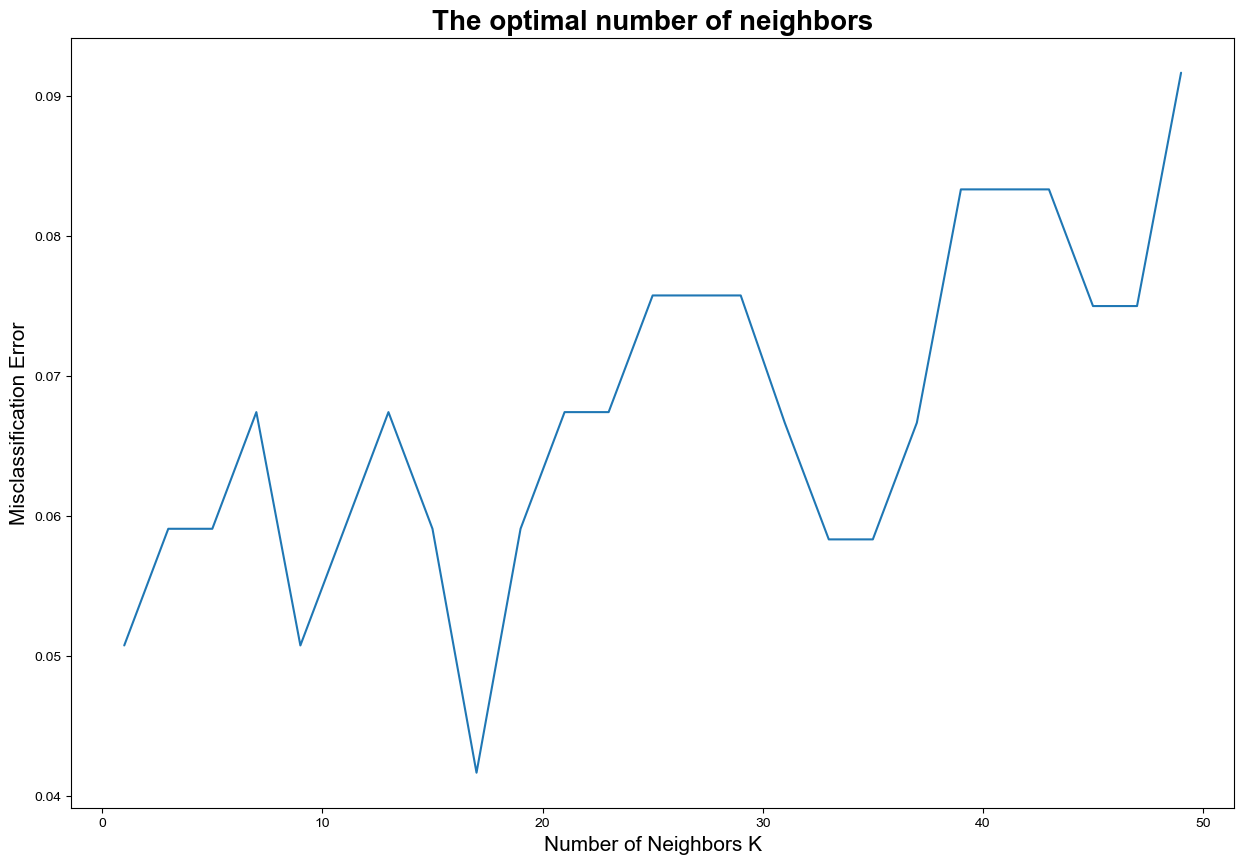

In [28]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [29]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 17.


In [30]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_columns].values
y = df['species'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


classifier = KNeighborsClassifier(n_neighbors=17)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [38]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

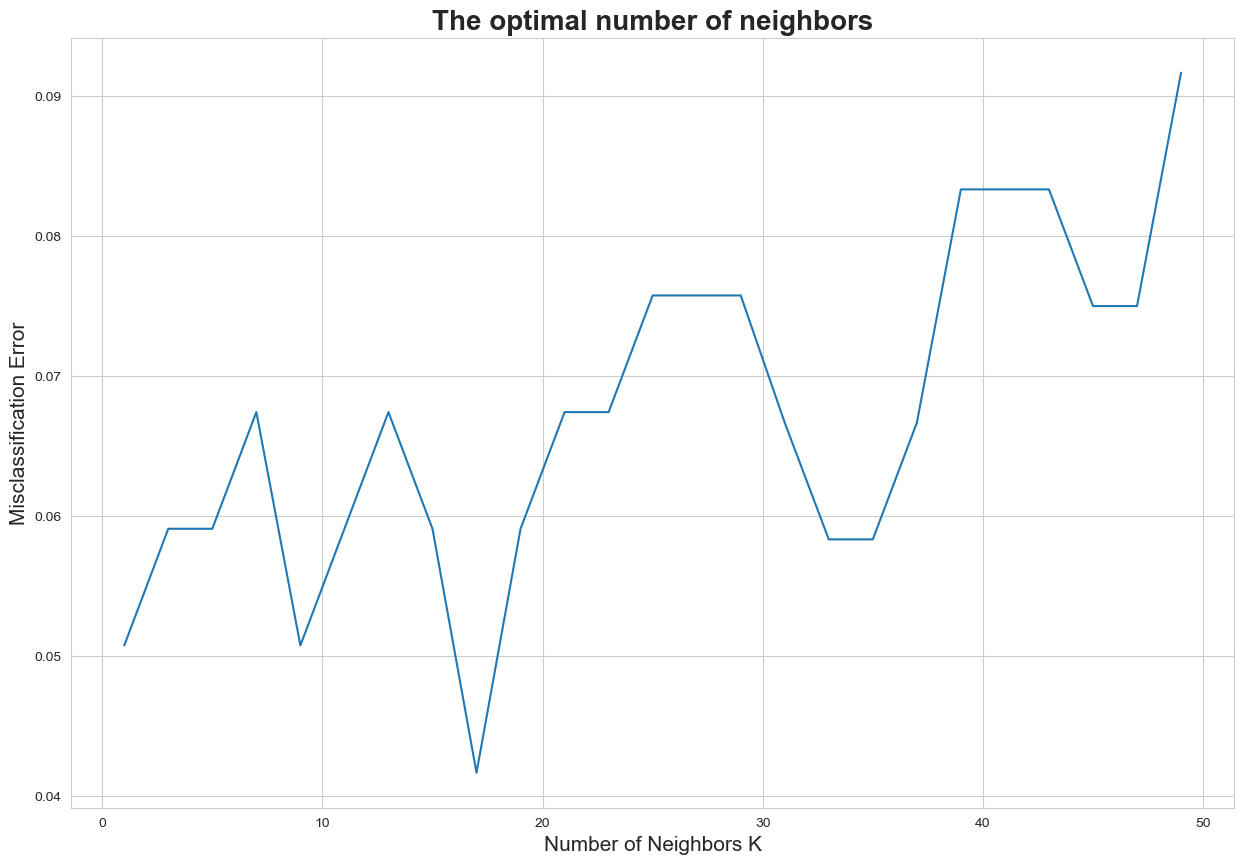

In [39]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

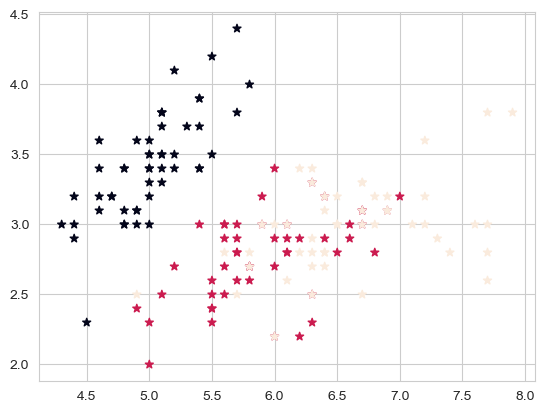

In [40]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, marker = '*')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 125)

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict([X_test[6]])
print('Actual value: ', y_test[6])
print('Predicted value: ', predicted[0])

Actual value:  2
Predicted value:  2


In [43]:
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average='weighted')
print('Accuracy is: ', accuracy)
print('F1 Score is: ', f1)

Accuracy is:  0.9210526315789473
F1 Score is:  0.9197994987468671


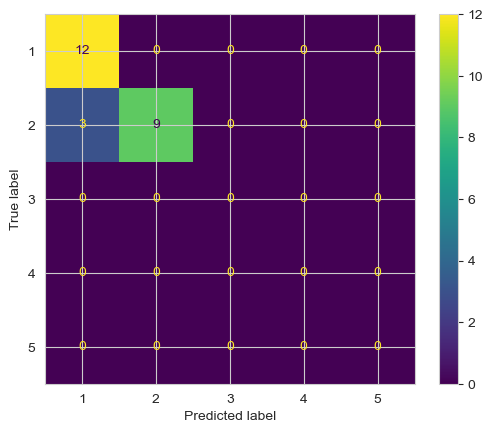

In [46]:
labels = [1,2,3,4,5]
cm = confusion_matrix(y_pred, y_test, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

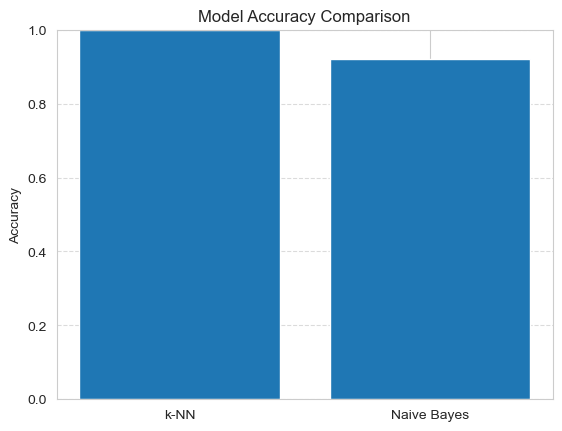

In [48]:
import matplotlib.pyplot as plt

knn_accuracy = 1
nb_accuracy = 0.92


models = ['k-NN', 'Naive Bayes']
accuracies = [knn_accuracy, nb_accuracy]

# Bar plot
plt.bar(models, accuracies)
plt.ylim(0, 1)  # Accuracy scale from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
